In [1]:
library(dplyr)
library(Hmisc)
library(MESS)
library(data.table)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'Hmisc' was built under R version 3.5.2"Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: geepack
Loading required package: geeM
Loading required package: Matrix

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



In [2]:
w11 <- read.csv(file="C:/Users/Chen/Project/data/wea11rain.csv")
head(w11)

Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCTS,RA45,PT45_gt05
1,2007-05-01,83,50,32,32,51,25,1,3,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-02,59,42,16,11,42,16,7,1,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-03,66,46,21,20,40,17,30,1,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-04,66,49,23,22,41,19,28,1,...,0,0,1,0,0,0,0,0,NA,NA
1,2007-05-05,66,53,25,23,38,18,26,1,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-06,68,49,24,22,30,15,27,1,...,0,0,0,0,0,0,0,0,NA,NA


In [3]:
w22 <- read.csv(file="C:/Users/Chen/Project/data/wea22.imp1.csv")
head(w22)
dim(w22)

ID,Station2,Date2,Tmax2,Tmin2,Tavg2,DewPoint2,WetBulb2,Heat2,Cool2,...,SQ2,TS2,TSRA2,VCFG2,VCTS2,Tmax2.imp,Tavg2.imp,PrecipTotal2.imp,RA45.2,PT45_gt05
1,2,2007-05-01,84,52,33,51,26,1,4,...,0,0,0,0,0,84,33.00000,0,NA,NA
2,2,2007-05-02,60,43,17,42,16,6,1,...,0,0,0,0,0,60,17.00000,0,NA,NA
3,2,2007-05-03,67,48,23,40,19,28,1,...,0,0,0,0,0,67,23.00000,0,NA,NA
4,2,2007-05-04,78,51,NA,42,19,NA,NA,...,0,0,0,0,0,78,35.20733,0,NA,NA
5,2,2007-05-05,66,54,25,39,19,26,1,...,0,0,0,0,0,66,25.00000,0,NA,NA
6,2,2007-05-06,68,52,25,30,15,26,1,...,0,0,0,0,0,68,25.00000,0,NA,NA


[1] 1472   36

In [4]:
colnames(w22)[36] <- "PT45_gt052"

In [5]:
colnames(w22)[3] <- "Date"

In [7]:
w22$Date <- as.Date(w22$Date, format = "%Y-%m-%d")
w11$Date <- as.Date(w11$Date, format = "%Y-%m-%d")

In [8]:
#w22$Date <-NULL

In [8]:
head(w22)
dim(w22)
head(w11)
dim(w11)

ID,Station2,Date,Tmax2,Tmin2,Tavg2,DewPoint2,WetBulb2,Heat2,Cool2,...,SQ2,TS2,TSRA2,VCFG2,VCTS2,Tmax2.imp,Tavg2.imp,PrecipTotal2.imp,RA45.2,PT45_gt052
1,2,2007-05-01,84,52,33,51,26,1,4,...,0,0,0,0,0,84,33.00000,0,NA,NA
2,2,2007-05-02,60,43,17,42,16,6,1,...,0,0,0,0,0,60,17.00000,0,NA,NA
3,2,2007-05-03,67,48,23,40,19,28,1,...,0,0,0,0,0,67,23.00000,0,NA,NA
4,2,2007-05-04,78,51,NA,42,19,NA,NA,...,0,0,0,0,0,78,35.20733,0,NA,NA
5,2,2007-05-05,66,54,25,39,19,26,1,...,0,0,0,0,0,66,25.00000,0,NA,NA
6,2,2007-05-06,68,52,25,30,15,26,1,...,0,0,0,0,0,68,25.00000,0,NA,NA


[1] 1472   36

Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCTS,RA45,PT45_gt05
1,2007-05-01,83,50,32,32,51,25,1,3,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-02,59,42,16,11,42,16,7,1,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-03,66,46,21,20,40,17,30,1,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-04,66,49,23,22,41,19,28,1,...,0,0,1,0,0,0,0,0,NA,NA
1,2007-05-05,66,53,25,23,38,18,26,1,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-06,68,49,24,22,30,15,27,1,...,0,0,0,0,0,0,0,0,NA,NA


[1] 1472   35

In [9]:
w0<-merge(x=w22, y=w11, by = "Date", all.x=TRUE)
dim(w0)
head(w0)

[1] 1472   70

Date,ID,Station2,Tmax2,Tmin2,Tavg2,DewPoint2,WetBulb2,Heat2,Cool2,...,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCTS,RA45,PT45_gt05
2007-05-01,1,2,84,52,33,51,26,1,4,...,0,0,0,0,0,0,0,0,NA,NA
2007-05-02,2,2,60,43,17,42,16,6,1,...,0,0,0,0,0,0,0,0,NA,NA
2007-05-03,3,2,67,48,23,40,19,28,1,...,0,0,0,0,0,0,0,0,NA,NA
2007-05-04,4,2,78,51,NA,42,19,NA,NA,...,0,0,1,0,0,0,0,0,NA,NA
2007-05-05,5,2,66,54,25,39,19,26,1,...,0,0,0,0,0,0,0,0,NA,NA
2007-05-06,6,2,68,52,25,30,15,26,1,...,0,0,0,0,0,0,0,0,NA,NA


In [18]:
colnames(w0)

[1] "Date"             "ID"               "Station2"         "Tmax2"           
 [5] "Tmin2"            "Tavg2"            "DewPoint2"        "WetBulb2"        
 [9] "Heat2"            "Cool2"            "PrecipTotal2"     "StnPressure2"    
[13] "SeaLevel2"        "ResultSpeed2"     "ResultDir2"       "AvgSpeed2"       
[17] "BCFG2"            "BR2"              "DZ2"              "FG2"             
[21] "FG.2"             "FU2"              "GR2"              "HZ2"             
[25] "RA2"              "SN2"              "SQ2"              "TS2"             
[29] "TSRA2"            "VCFG2"            "VCTS2"            "Tmax2.imp"       
[33] "Tavg2.imp"        "PrecipTotal2.imp" "RA45.2"           "PT45_gt052"      
[37] "Station"          "Tmax"             "Tmin"             "Tavg"            
[41] "Depart"           "DewPoint"         "WetBulb"          "Heat"            
[45] "Cool"             "Sunrise"          "Sunset"           "SnowFall"        
[49] "PrecipTotal"      "StnPressure"      "SeaLevel"         "ResultSpeed"     
[53] "ResultDir"        "AvgSpeed"         "BCFG"             "BR"              
[57] "DZ"               "FG"               "FG."              "FU"              
[61] "HZ"               "MIFG"             "RA"               "SN"              
[65] "SQ"               "TS"               "TSRA"             "VCTS"            
[69] "RA45"             "PT45_gt05"

In [10]:
myvars <- c('Date', 'ID', 'PrecipTotal','PT45_gt05','PrecipTotal2.imp','PT45_gt052','RA2','RA45.2', 'RA','RA45')
w2 <- w0[myvars]

head(w2)
dim(w2)


Date,ID,PrecipTotal,PT45_gt05,PrecipTotal2.imp,PT45_gt052,RA2,RA45.2,RA,RA45
2007-05-01,1,0,NA,0,NA,0,NA,0,NA
2007-05-02,2,0,NA,0,NA,0,NA,0,NA
2007-05-03,3,0,NA,0,NA,0,NA,0,NA
2007-05-04,4,0,NA,0,NA,0,NA,1,NA
2007-05-05,5,0,NA,0,NA,0,NA,0,NA
2007-05-06,6,0,NA,0,NA,0,NA,0,NA


[1] 1472   10

In [47]:
write.csv(w0, file="C:/Users/Chen/Project/data/w0.csv", row.names =F)

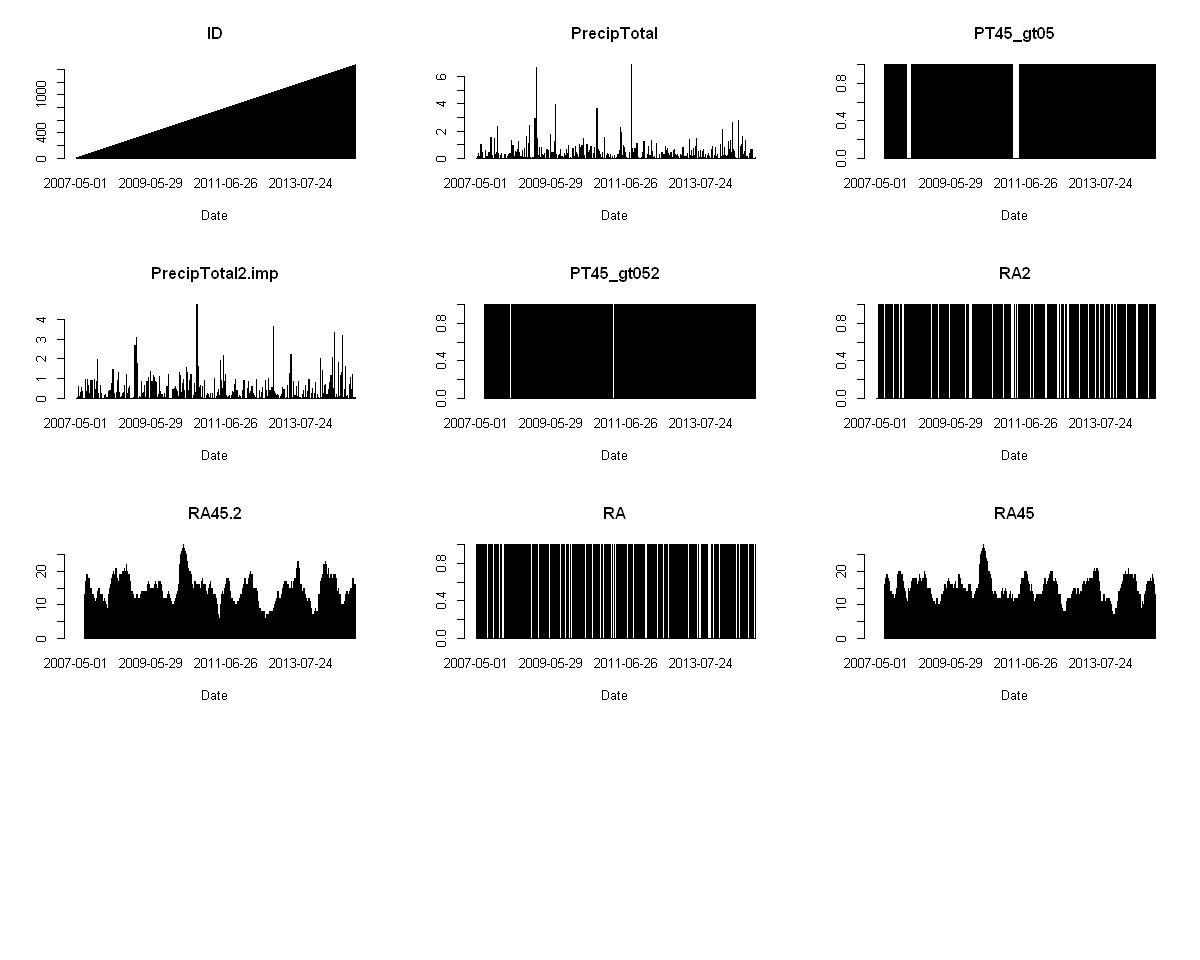

In [17]:
options(repr.plot.width = 10, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(w2[,2:10])) {
    barplot(w2[[v]], names.arg=w0$Date, main=v, xlab="Date" )
}
par(mfrow=c(1,1))

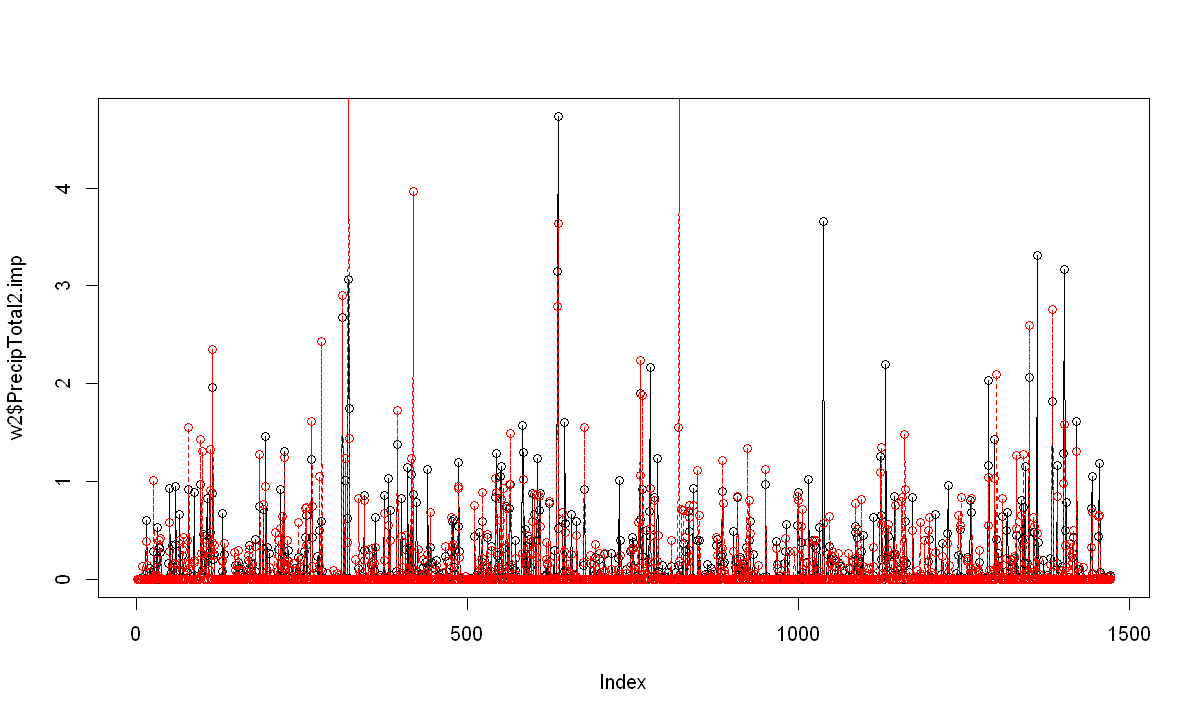

In [22]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot(w2$PrecipTotal2.imp, type = "o",)  ## index plot with one variable
lines(w2$PrecipTotal, type="o", lty = 2, col = "red")  ## add another variable


In [30]:
w2$year<-format(w2$Date,'%Y')

In [31]:
head(w2)

Date,ID,PrecipTotal,PT45_gt05,PrecipTotal2.imp,PT45_gt052,RA2,RA45.2,RA,RA45,year
2007-05-01,1,0,NA,0,NA,0,NA,0,NA,2007
2007-05-02,2,0,NA,0,NA,0,NA,0,NA,2007
2007-05-03,3,0,NA,0,NA,0,NA,0,NA,2007
2007-05-04,4,0,NA,0,NA,0,NA,1,NA,2007
2007-05-05,5,0,NA,0,NA,0,NA,0,NA,2007
2007-05-06,6,0,NA,0,NA,0,NA,0,NA,2007


In [36]:
y07 <- w2[ which(w2$year=='2007'), ]
y09 <- w2[ which(w2$year=='2009'), ]
y11 <- w2[ which(w2$year=='2011'), ]

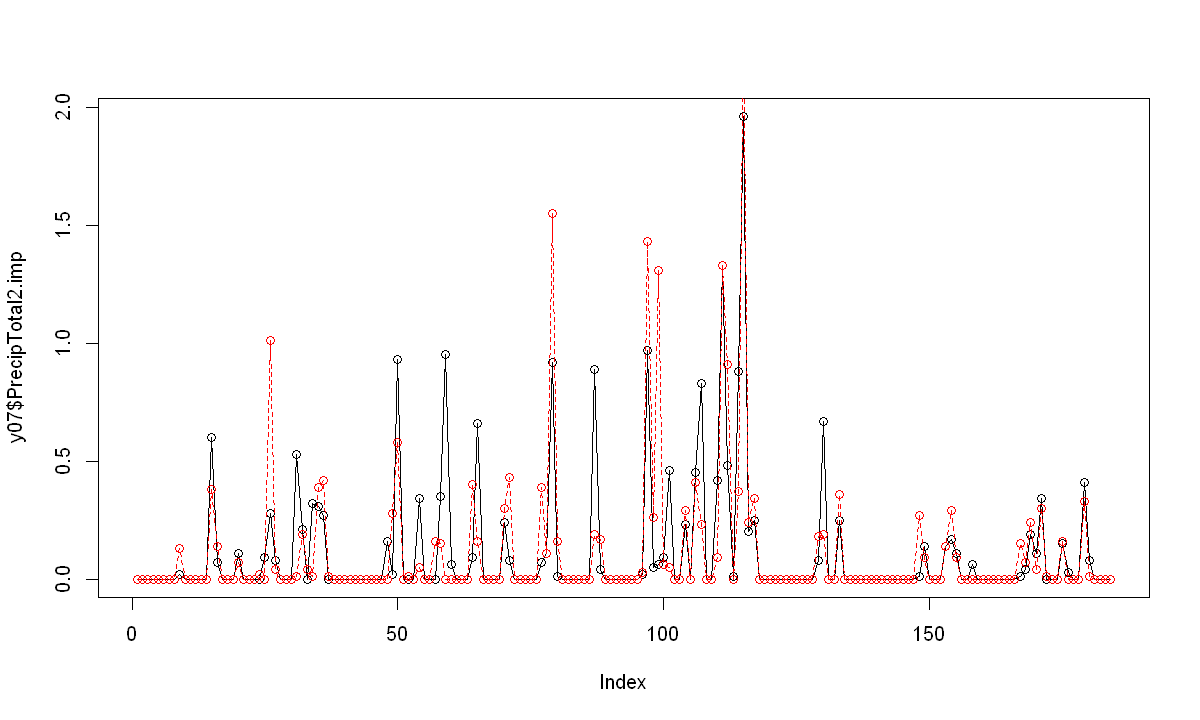

In [37]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot(y07$PrecipTotal2.imp, type = "o",)  ## index plot with one variable
lines(y07$PrecipTotal, type="o", lty = 2, col = "red")  ## add another variable

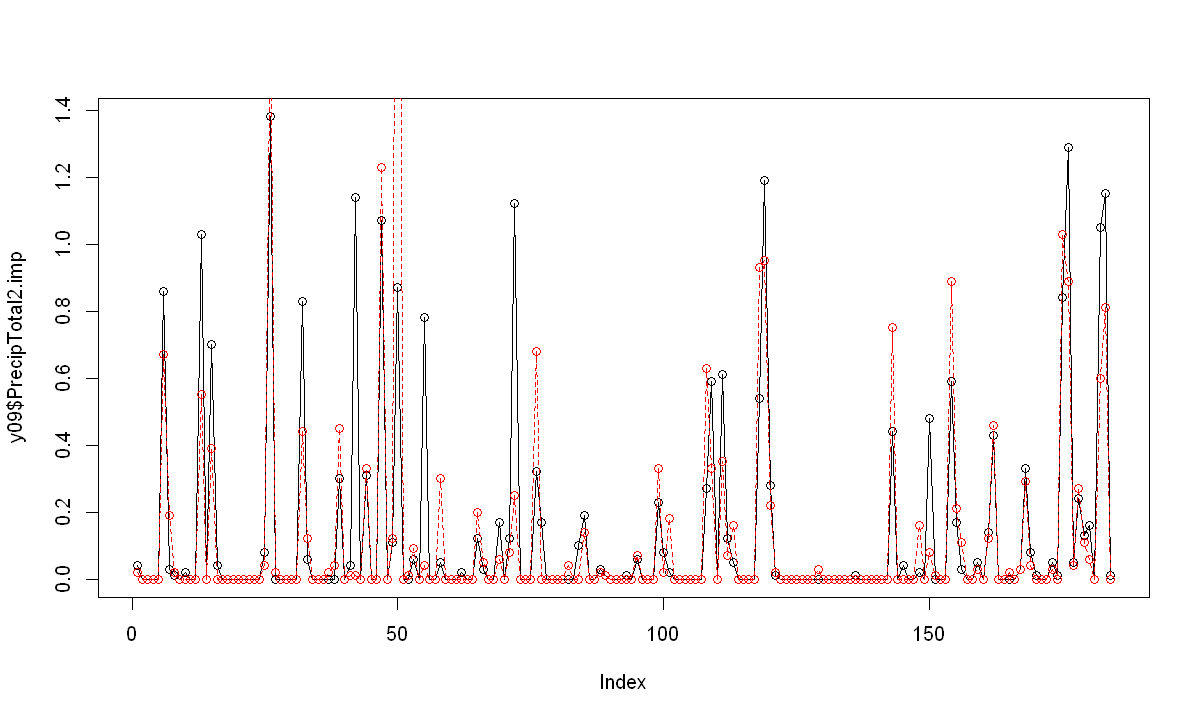

In [38]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot(y09$PrecipTotal2.imp, type = "o",)  ## index plot with one variable
lines(y09$PrecipTotal, type="o", lty = 2, col = "red")  ## add another variable

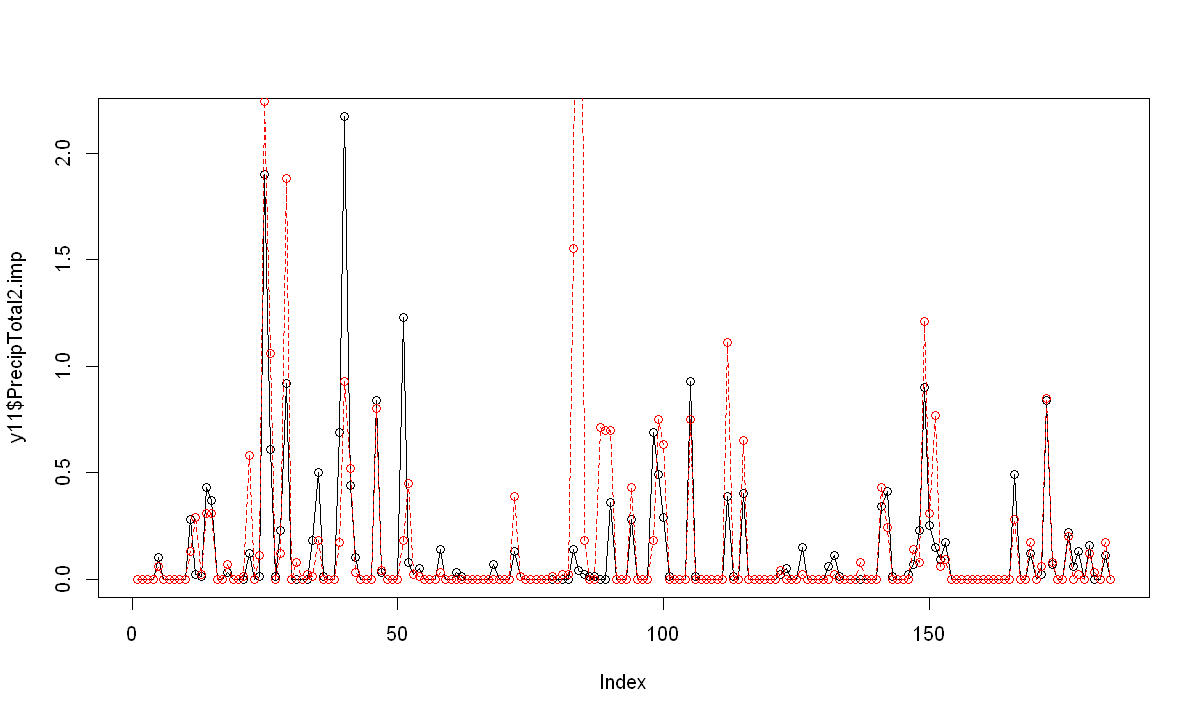

In [39]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot(y11$PrecipTotal2.imp, type = "o",)  ## index plot with one variable
lines(y11$PrecipTotal, type="o", lty = 2, col = "red")  ## add another variable

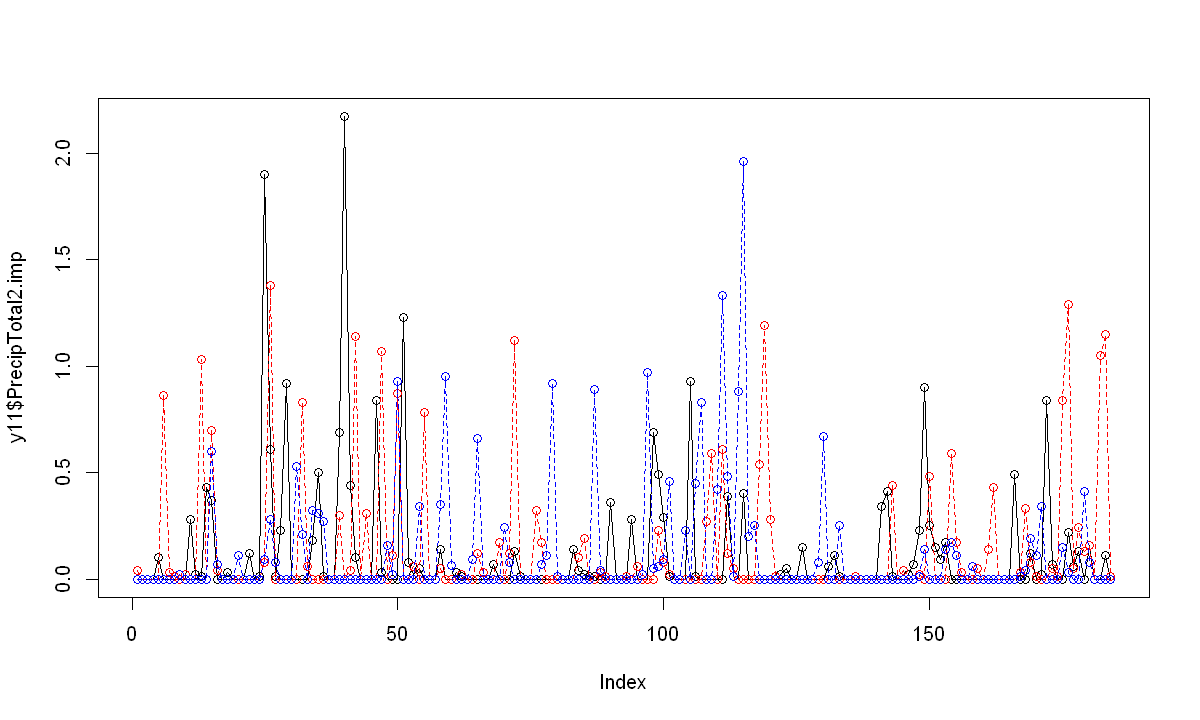

In [41]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot(y11$PrecipTotal2.imp, type = "o",)  ## index plot with one variable
lines(y09$PrecipTotal2.imp, type="o", lty = 2, col = "red")  ## add another variable
lines(y07$PrecipTotal2.imp, type="o", lty = 2, col = "blue")  ## add another variable

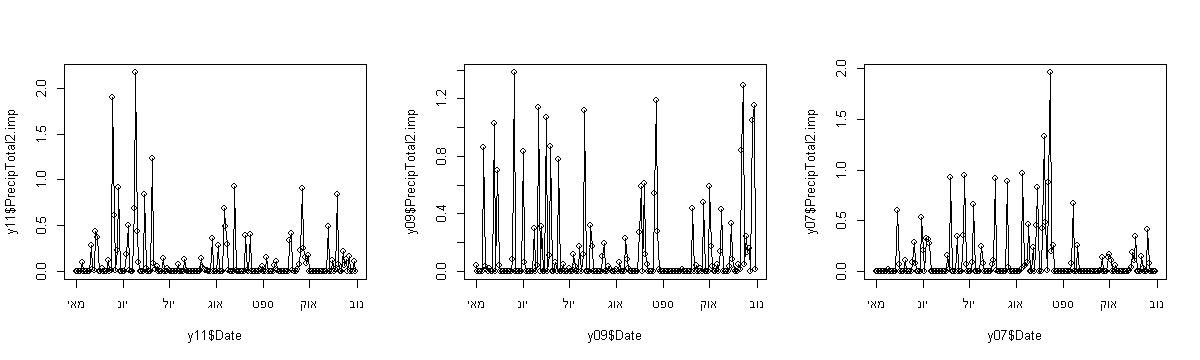

In [46]:
options(repr.plot.width = 10, repr.plot.height = 3)
par(mfrow=c(1,3))
plot(y11$PrecipTotal2.imp~y11$Date, type = "o")  ## index plot with one variable
plot(y09$PrecipTotal2.imp~y09$Date, type="o")  ## add another variable
plot(y07$PrecipTotal2.imp~y07$Date, type="o")  ## add another variable

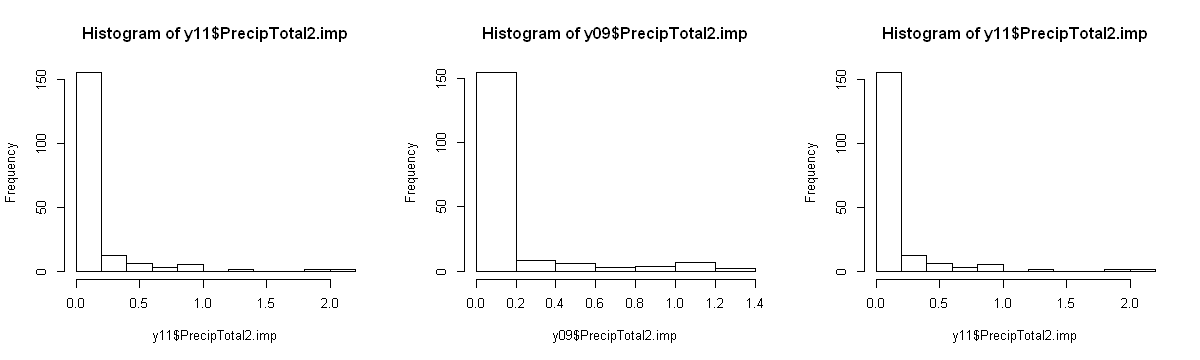

In [45]:
options(repr.plot.width = 10, repr.plot.height = 3)
par(mfrow=c(1,3))
hist(y11$PrecipTotal2.imp)
hist(y09$PrecipTotal2.imp)
hist(y11$PrecipTotal2.imp)

In [48]:
colnames(w0)

[1] "Date"             "ID"               "Station2"         "Tmax2"           
 [5] "Tmin2"            "Tavg2"            "DewPoint2"        "WetBulb2"        
 [9] "Heat2"            "Cool2"            "PrecipTotal2"     "StnPressure2"    
[13] "SeaLevel2"        "ResultSpeed2"     "ResultDir2"       "AvgSpeed2"       
[17] "BCFG2"            "BR2"              "DZ2"              "FG2"             
[21] "FG.2"             "FU2"              "GR2"              "HZ2"             
[25] "RA2"              "SN2"              "SQ2"              "TS2"             
[29] "TSRA2"            "VCFG2"            "VCTS2"            "Tmax2.imp"       
[33] "Tavg2.imp"        "PrecipTotal2.imp" "RA45.2"           "PT45_gt052"      
[37] "Station"          "Tmax"             "Tmin"             "Tavg"            
[41] "Depart"           "DewPoint"         "WetBulb"          "Heat"            
[45] "Cool"             "Sunrise"          "Sunset"           "SnowFall"        
[49] "PrecipTotal"      "StnPressure"      "SeaLevel"         "ResultSpeed"     
[53] "ResultDir"        "AvgSpeed"         "BCFG"             "BR"              
[57] "DZ"               "FG"               "FG."              "FU"              
[61] "HZ"               "MIFG"             "RA"               "SN"              
[65] "SQ"               "TS"               "TSRA"             "VCTS"            
[69] "RA45"             "PT45_gt05"

In [49]:
head(w0, 50)

Date,ID,Station2,Tmax2,Tmin2,Tavg2,DewPoint2,WetBulb2,Heat2,Cool2,...,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCTS,RA45,PT45_gt05
2007-05-01,1,2,84,52,33,51,26,1,4,...,0,0,0,0,0,0,0,0,NA,NA
2007-05-02,2,2,60,43,17,42,16,6,1,...,0,0,0,0,0,0,0,0,NA,NA
2007-05-03,3,2,67,48,23,40,19,28,1,...,0,0,0,0,0,0,0,0,NA,NA
2007-05-04,4,2,78,51,NA,42,19,NA,NA,...,0,0,1,0,0,0,0,0,NA,NA
2007-05-05,5,2,66,54,25,39,19,26,1,...,0,0,0,0,0,0,0,0,NA,NA
2007-05-06,6,2,68,52,25,30,15,26,1,...,0,0,0,0,0,0,0,0,NA,NA
2007-05-07,7,2,84,50,32,39,22,1,3,...,0,0,1,0,0,0,0,0,NA,NA
2007-05-08,8,2,80,60,35,57,32,1,6,...,0,0,0,0,0,0,0,0,NA,NA
2007-05-09,9,2,76,63,35,60,32,1,6,...,1,0,0,0,0,0,0,0,NA,NA
2007-05-10,10,2,83,59,36,52,30,1,7,...,0,0,0,0,0,0,0,0,NA,NA


In [95]:
w0 <- read.csv(file="C:/Users/Chen/Project/data/w0.csv")
head(w11)
dim(w0)

Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCTS,RA45,PT45_gt05
1,2007-05-01,83,50,32,32,51,25,1,3,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-02,59,42,16,11,42,16,7,1,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-03,66,46,21,20,40,17,30,1,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-04,66,49,23,22,41,19,28,1,...,0,0,1,0,0,0,0,0,NA,NA
1,2007-05-05,66,53,25,23,38,18,26,1,...,0,0,0,0,0,0,0,0,NA,NA
1,2007-05-06,68,49,24,22,30,15,27,1,...,0,0,0,0,0,0,0,0,NA,NA


[1] 1472   70

In [96]:
str(w0)

'data.frame':	1472 obs. of  70 variables:
 $ Date            : Factor w/ 1472 levels "01/05/2007","01/05/2008",..: 1 49 97 145 193 241 289 337 385 433 ...
 $ ID              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Station2        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Tmax2           : int  84 60 67 78 66 68 84 80 76 83 ...
 $ Tmin2           : int  52 43 48 51 54 52 50 60 63 59 ...
 $ Tavg2           : int  33 17 23 NA 25 25 32 35 35 36 ...
 $ DewPoint2       : int  51 42 40 42 39 30 39 57 60 52 ...
 $ WetBulb2        : int  26 16 19 19 19 15 22 32 32 30 ...
 $ Heat2           : int  1 6 28 NA 26 26 1 1 1 1 ...
 $ Cool2           : int  4 1 1 NA 1 1 3 6 6 7 ...
 $ PrecipTotal2    : num  0 0 0 0 0 0 0 0 0.02 0 ...
 $ StnPressure2    : num  29.2 29.4 29.5 29.4 29.5 ...
 $ SeaLevel2       : num  29.8 30.1 30.1 30 30.1 ...
 $ ResultSpeed2    : num  2.7 13.3 12.9 10.1 11.2 13.8 8.5 2.5 3.9 2 ...
 $ ResultDir2      : int  25 2 6 7 7 10 17 8 7 9 ...
 $ AvgSpeed2       : num  9.6 13.4 13.2 10.4 11.5 14

In [97]:
w0$Date <- as.Date(w0$Date, format = "%d/%m/%Y")

In [98]:
str(w0)

'data.frame':	1472 obs. of  70 variables:
 $ Date            : Date, format: "2007-05-01" "2007-05-02" ...
 $ ID              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Station2        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Tmax2           : int  84 60 67 78 66 68 84 80 76 83 ...
 $ Tmin2           : int  52 43 48 51 54 52 50 60 63 59 ...
 $ Tavg2           : int  33 17 23 NA 25 25 32 35 35 36 ...
 $ DewPoint2       : int  51 42 40 42 39 30 39 57 60 52 ...
 $ WetBulb2        : int  26 16 19 19 19 15 22 32 32 30 ...
 $ Heat2           : int  1 6 28 NA 26 26 1 1 1 1 ...
 $ Cool2           : int  4 1 1 NA 1 1 3 6 6 7 ...
 $ PrecipTotal2    : num  0 0 0 0 0 0 0 0 0.02 0 ...
 $ StnPressure2    : num  29.2 29.4 29.5 29.4 29.5 ...
 $ SeaLevel2       : num  29.8 30.1 30.1 30 30.1 ...
 $ ResultSpeed2    : num  2.7 13.3 12.9 10.1 11.2 13.8 8.5 2.5 3.9 2 ...
 $ ResultDir2      : int  25 2 6 7 7 10 17 8 7 9 ...
 $ AvgSpeed2       : num  9.6 13.4 13.2 10.4 11.5 14.5 9.9 5.4 5.9 3.9 ...
 $ BCFG2           : int 

In [99]:
w0$year<-format(w0$Date,'%Y')
w0$Month<-format(w0$Date,'%m')

In [100]:
w0$MoDay<-format(w0$Date,'%d')

In [108]:
w0$Month_Day<-format(w0$Date,'%m-%d')

In [109]:
str(w0)

'data.frame':	1472 obs. of  74 variables:
 $ Date            : Date, format: "2007-05-01" "2007-05-02" ...
 $ ID              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Station2        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Tmax2           : int  84 60 67 78 66 68 84 80 76 83 ...
 $ Tmin2           : int  52 43 48 51 54 52 50 60 63 59 ...
 $ Tavg2           : int  33 17 23 NA 25 25 32 35 35 36 ...
 $ DewPoint2       : int  51 42 40 42 39 30 39 57 60 52 ...
 $ WetBulb2        : int  26 16 19 19 19 15 22 32 32 30 ...
 $ Heat2           : int  1 6 28 NA 26 26 1 1 1 1 ...
 $ Cool2           : int  4 1 1 NA 1 1 3 6 6 7 ...
 $ PrecipTotal2    : num  0 0 0 0 0 0 0 0 0.02 0 ...
 $ StnPressure2    : num  29.2 29.4 29.5 29.4 29.5 ...
 $ SeaLevel2       : num  29.8 30.1 30.1 30 30.1 ...
 $ ResultSpeed2    : num  2.7 13.3 12.9 10.1 11.2 13.8 8.5 2.5 3.9 2 ...
 $ ResultDir2      : int  25 2 6 7 7 10 17 8 7 9 ...
 $ AvgSpeed2       : num  9.6 13.4 13.2 10.4 11.5 14.5 9.9 5.4 5.9 3.9 ...
 $ BCFG2           : int 

In [102]:
describe(w0$RA45) 
describe(w0$RA45.2)
describe(w0$PT45_gt05)
describe(w0$PT45_gt052)

w0$RA45 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1428       44       24    0.992    14.57    3.981        9       10 
     .25      .50      .75      .90      .95 
      12       14       17       19       20 

lowest :  5  6  7  8  9, highest: 24 25 26 27 28

w0$RA45.2 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1428       44       24    0.994    14.06    4.558        7        9 
     .25      .50      .75      .90      .95 
      11       14       17       19       21 

lowest :  5  6  7  8  9, highest: 24 25 26 27 28

w0$PT45_gt05 
       n  missing distinct     Info      Sum     Mean      Gmd 
    1428       44        2     0.13     1363   0.9545  0.08695 


w0$PT45_gt052 
       n  missing distinct     Info      Sum     Mean      Gmd 
    1428       44        2     0.05     1404   0.9832  0.03307 


In [103]:
w0$RA45[w0$Month == "05"] <- NA

In [104]:
describe(w0$RA45) 

w0$RA45 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1211      261       20    0.991    14.05    3.708        9       10 
     .25      .50      .75      .90      .95 
      12       14       17       18       19 
                                                                            
Value          5     6     7     8     9    10    11    12    13    14    15
Frequency      2     4    16    30    47    59   102   142   173   135   100
Proportion 0.002 0.003 0.013 0.025 0.039 0.049 0.084 0.117 0.143 0.111 0.083
                                                                
Value         16    17    18    19    20    21    22    23    24
Frequency     89    95   102    62    32    13     4     2     2
Proportion 0.073 0.078 0.084 0.051 0.026 0.011 0.003 0.002 0.002

In [105]:
describe(w0$Month)

w0$Month 
       n  missing distinct 
    1472        0        6 
                                              
Value          5     6     7     8     9    10
Frequency    248   240   248   248   240   248
Proportion 0.168 0.163 0.168 0.168 0.163 0.168

In [110]:
describe(w0$Month_Day<='06-13')

w0$Month_Day <= "06-13" 
       n  missing distinct 
    1472        0        2 
                      
Value      FALSE  TRUE
Frequency   1120   352
Proportion 0.761 0.239

In [111]:
w0$RA45.2[w0$Month == "05"] <- NA
w0$PT45_gt05[w0$Month == "05"] <- NA
w0$PT45_gt052[w0$Month == "05"] <- NA

In [112]:
describe(w0$RA45) 
describe(w0$RA45.2)
describe(w0$PT45_gt05)
describe(w0$PT45_gt052)

w0$RA45 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1211      261       20    0.991    14.05    3.708        9       10 
     .25      .50      .75      .90      .95 
      12       14       17       18       19 
                                                                            
Value          5     6     7     8     9    10    11    12    13    14    15
Frequency      2     4    16    30    47    59   102   142   173   135   100
Proportion 0.002 0.003 0.013 0.025 0.039 0.049 0.084 0.117 0.143 0.111 0.083
                                                                
Value         16    17    18    19    20    21    22    23    24
Frequency     89    95   102    62    32    13     4     2     2
Proportion 0.073 0.078 0.084 0.051 0.026 0.011 0.003 0.002 0.002

w0$RA45.2 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1211      261       20    0.993    13.56    4.096        8        9 
     .25      .50      .75      .90      .95 
      11       13       16       18       19 
                                                                            
Value          5     6     7     8     9    10    11    12    13    14    15
Frequency     10    11    38    49    51    84   111   125   142   110   118
Proportion 0.008 0.009 0.031 0.040 0.042 0.069 0.092 0.103 0.117 0.091 0.097
                                                                
Value         16    17    18    19    20    21    22    23    24
Frequency     99    79    69    60    23    15    11     4     2
Proportion 0.082 0.065 0.057 0.050 0.019 0.012 0.009 0.003 0.002

w0$PT45_gt05 
       n  missing distinct     Info      Sum     Mean      Gmd 
    1211      261        2    0.103     1168   0.9645  0.06855 


w0$PT45_gt052 
       n  missing distinct     Info      Sum     Mean      Gmd 
    1211      261        2    0.056     1188    0.981  0.03729 


In [123]:
w01<-w0

In [124]:
describe(w01)

w01 

 74  Variables      1472  Observations
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
    1472        0     1472 

lowest : 2007-05-01 2007-05-02 2007-05-03 2007-05-04 2007-05-05
highest: 2014-10-27 2014-10-28 2014-10-29 2014-10-30 2014-10-31
--------------------------------------------------------------------------------
ID 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1472        0     1472        1    736.5      491    74.55   148.10 
     .25      .50      .75      .90      .95 
  368.75   736.50  1104.25  1324.90  1398.45 

lowest :    1    2    3    4    5, highest: 1468 1469 1470 1471 1472
--------------------------------------------------------------------------------
Station2 
       n  missing distinct     Info     Mean      Gmd 
    1472        0        1        0        2        0 
               
Value         2
Frequency  1472
Proportion    1
-------------------------

In [125]:
sum(w01$Month <= "06-13")

[1] 488

In [128]:
sum(w01$MoDay<="13" & w01$Month=="06")

[1] 104

In [130]:
w01$RA45[(w01$MoDay<="13" & w01$Month=="06")] <- NA

In [135]:
w01$RA45.2[(w01$MoDay<="13" & w01$Month=="06")] <- NA
w01$PT45_gt05[(w01$MoDay<="13" & w01$Month=="06")] <- NA
w01$PT45_gt052[(w01$MoDay<="13" & w01$Month=="06")] <- NA


In [136]:
describe(w01)

w01 

 74  Variables      1472  Observations
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
    1472        0     1472 

lowest : 2007-05-01 2007-05-02 2007-05-03 2007-05-04 2007-05-05
highest: 2014-10-27 2014-10-28 2014-10-29 2014-10-30 2014-10-31
--------------------------------------------------------------------------------
ID 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1472        0     1472        1    736.5      491    74.55   148.10 
     .25      .50      .75      .90      .95 
  368.75   736.50  1104.25  1324.90  1398.45 

lowest :    1    2    3    4    5, highest: 1468 1469 1470 1471 1472
--------------------------------------------------------------------------------
Station2 
       n  missing distinct     Info     Mean      Gmd 
    1472        0        1        0        2        0 
               
Value         2
Frequency  1472
Proportion    1
-------------------------

In [138]:
write.csv(w01, file="C:/Users/Chen/Project/data/w01.csv", row.names =F)